<a href="https://colab.research.google.com/github/MAVIN-07/sbi-hackathon/blob/main/PCA_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Necessary Imports
!pip install numpy opencv-python scikit-learn

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
from google.colab import files

# Load the input image
img = cv2.imread('input_image.jpg')

"""
BGR image, the color
(0, 0, 255) represents pure blue,
(0, 255, 0) represents pure green, and
(255, 0, 0) represents pure red.
"""

# Convert from BGR to RGB (if needed)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
"""
RGB image, the color
(255, 0, 0) represents pure red,
(0, 255, 0) represents pure green, and
(0, 0, 255) represents pure blue.
"""

'\nRGB image, the color \n(255, 0, 0) represents pure red, \n(0, 255, 0) represents pure green, and \n(0, 0, 255) represents pure blue.\n'

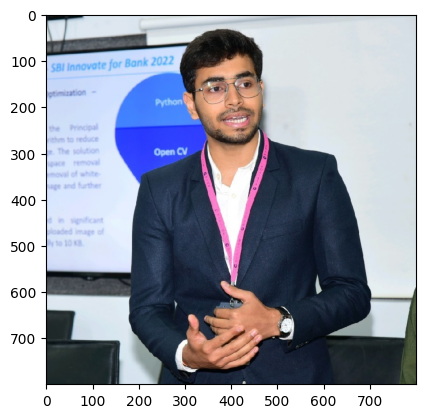

In [11]:
plt.imshow(img_rgb)

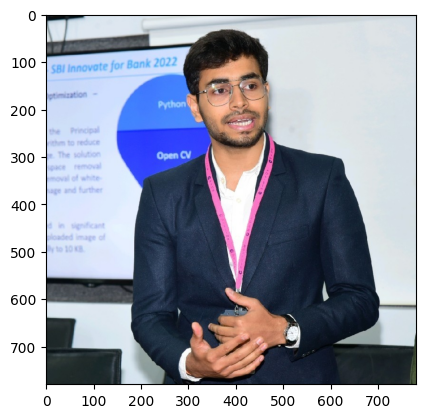

In [13]:
img_rgb = img_rgb[:-20,:-20] # Perform pre-cropping
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
gray = 255*(gray < 128).astype(np.uint8) # To invert the text to white
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, np.ones((2, 2), dtype=np.uint8)) # Perform noise filtering
coords = cv2.findNonZero(gray) # Find all non-zero points (text)
x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
rect = img_rgb[y:y+h, x:x+w] # Crop the image - note we do this on the original image
plt.imshow(rect)
plt.show() # Show it

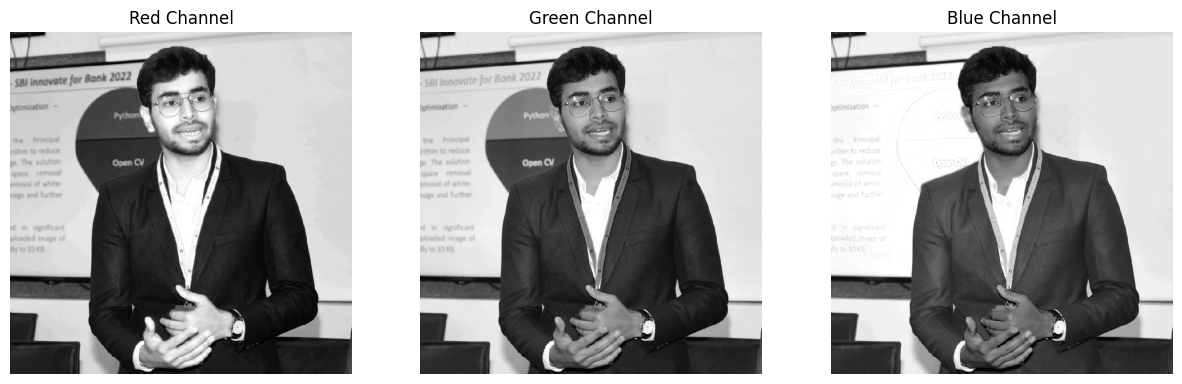

In [24]:
# Splitting into channels
red, green, blue = cv2.split(rect)

# Plotting the images
fig = plt.figure(figsize=(15, 7.2))

fig.add_subplot(131)
plt.title("Red Channel")
plt.imshow(red, cmap='gray')  # Use cmap='gray' if the channel is grayscale
plt.axis('off')

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green, cmap='gray')  # Use cmap='gray' if the channel is grayscale
plt.axis('off')

fig.add_subplot(133)
plt.title("Blue Channel")
plt.imshow(blue, cmap='gray')  # Use cmap='gray' if the channel is grayscale
plt.axis('off')

plt.show()

In [26]:
# Optional normalization
red_norm = red/255
green_norm = green/255
blue_norm = blue/255

In [27]:
# Perform PCA on each color channel
n_components = 50  # Number of principal components
pca_red = PCA(n_components=n_components)
pca_green = PCA(n_components=n_components)
pca_blue = PCA(n_components=n_components)

trans_pca_red = pca_red.fit_transform(red_norm)
trans_pca_green = pca_green.fit_transform(green_norm)
trans_pca_blue = pca_blue.fit_transform(blue_norm)

In [28]:
print(trans_pca_red.shape)
print(trans_pca_green.shape)
print(trans_pca_blue.shape)

(780, 50)
(780, 50)
(780, 50)


In [29]:
print(f"Explained Variance Ratio - Blue Channel: {sum(pca_blue.explained_variance_ratio_)}")
print(f"Explained Variance Ratio - Green Channel: {sum(pca_green.explained_variance_ratio_)}")
print(f"Explained Variance Ratio - Red Channel: {sum(pca_red.explained_variance_ratio_)}")

Explained Variance Ratio - Blue Channel: 0.9892877986587801
Explained Variance Ratio - Green Channel: 0.9878966430070842
Explained Variance Ratio - Red Channel: 0.9882491749970455


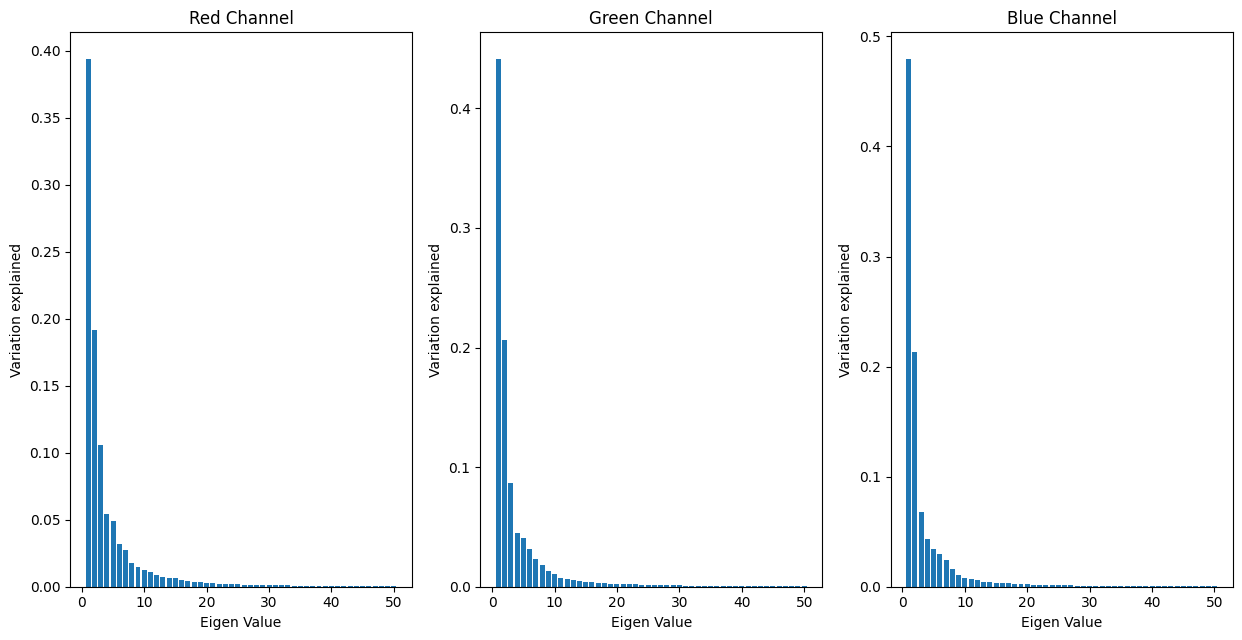

In [30]:
fig = plt.figure(figsize=(15, 7.2))

# Red Channel
fig.add_subplot(131)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, 51)), pca_red.explained_variance_ratio_)

# Green Channel
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, 51)), pca_green.explained_variance_ratio_)

# Blue Channel
fig.add_subplot(133)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, 51)), pca_blue.explained_variance_ratio_)

plt.show()

In [34]:
r_arr = pca_red.inverse_transform(trans_pca_red)
g_arr = pca_green.inverse_transform(trans_pca_green)
b_arr = pca_blue.inverse_transform(trans_pca_blue)
print(r_arr.shape, g_arr.shape, b_arr.shape)

(780, 780) (780, 780) (780, 780)


In [35]:
img_reduced = cv2.merge((r_arr, g_arr, b_arr))
print(img_reduced.shape)

(780, 780, 3)


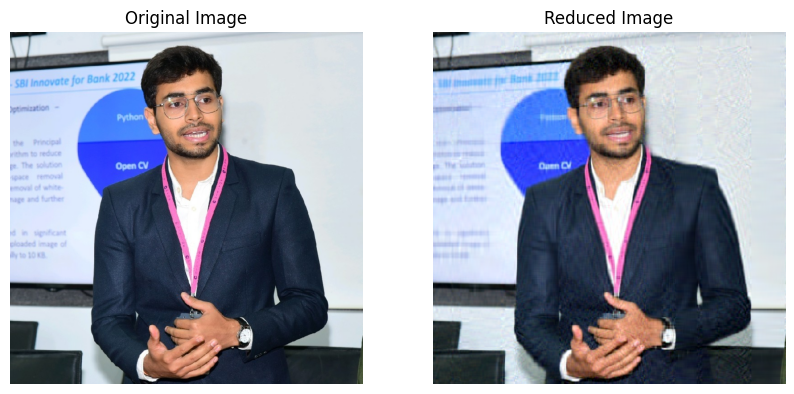

In [36]:
fig = plt.figure(figsize=(10, 7.2))

# Original Image
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')

# Reduced Image
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.axis('off')

plt.savefig("Compressed.jpg", bbox_inches='tight', pad_inches=0)
plt.show()